<a href="https://colab.research.google.com/github/chuchun2/ATMS-597-Project-3-Group-G/blob/edit-chuchun2/Developing_ipynb/ATMS597_Project3_GroupG_anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installs python packages needed
!pip install pydap
!pip install netcdf4
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cython
!pip install cartopy

     |████████████████████████████████| 2.3MB 2.9MB/s 
     |████████████████████████████████| 122kB 22.0MB/s 
     |████████████████████████████████| 4.1MB 2.8MB/s 
     |████████████████████████████████| 317kB 42.1MB/s 
Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.9MB/s 
Skipping wheel build

In [2]:
# import necessary packages
%pylab inline
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

Populating the interactive namespace from numpy and matplotlib


# Calculate and plot the long term mean

In [3]:
# loading the long term mean data
uwnd=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4')
vwnd=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4')
hgt=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc', engine='netcdf4')
air=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc', engine='netcdf4')
shum=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc', engine='netcdf4')
skt=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc', engine='netcdf4')
uwnd_sig995=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')
vwnd_sig995=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')
pr_wtr=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.mon.1981-2010.ltm.nc', engine='netcdf4')

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [0]:
skt

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    skt                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    title:                          4x daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    References:                     http://www.esrl.noaa.gov/psd/data/gridded...
    dataset_title:                  NCEP-NCAR Reanalysis 1

In [0]:
skt.isel(time=[9,10,11])

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 3)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-10-01 00:00:00 ... 0001-12-01 00:00:00
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    skt                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    title:                          4x daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    References:                     http://www.esrl.noaa.gov/psd/data/gridded...
    dataset_title:                  NCEP-NCAR Reanalysis 1

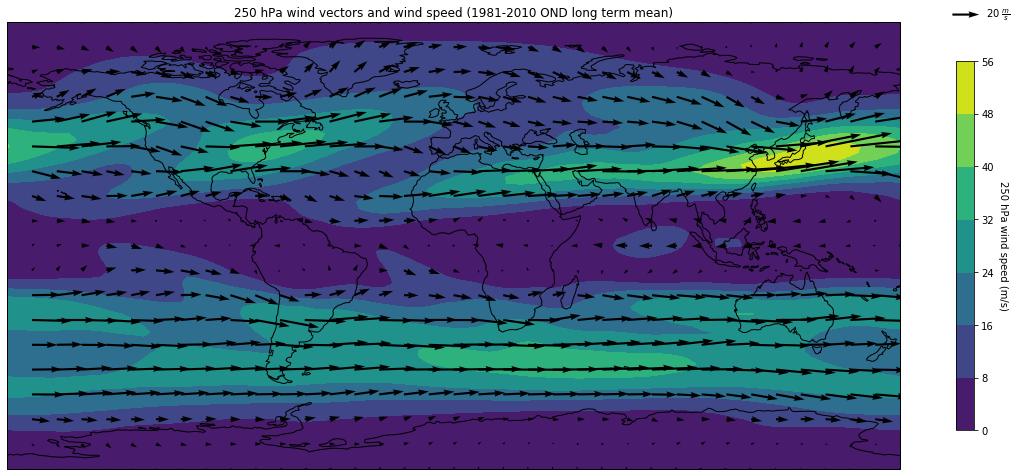

In [6]:
# Figure 1. 250 hPa wind vectors and wind speed
# (1981-2010 OND long term mean)

x = uwnd.lon
y = uwnd.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Caculate wind speed
u = uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
wspd_uv = sqrt(u**2+v**2)

# Add cyclic point
data = wspd_uv
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)

# Plot wind speed as filled contours
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('250 hPa wind speed (m/s)', size=10, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4  # change the density of quiver plot
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 20, r'$20\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('250 hPa wind vectors and wind speed (1981-2010 OND long term mean)');

plt.show()

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


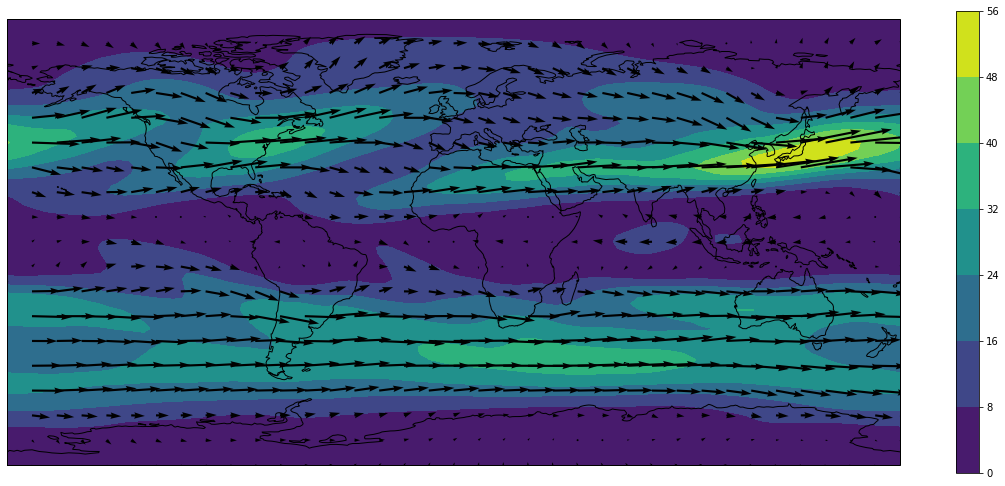

In [0]:
# (1) 250 hPa wind vectors and wind speed
# (1981-2010 OND long term mean)

x = uwnd.lon
y = uwnd.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot wind speed as filled contours
u = uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
wspd_uv = sqrt(u**2+v**2)

data = wspd_uv
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])

plt.show()

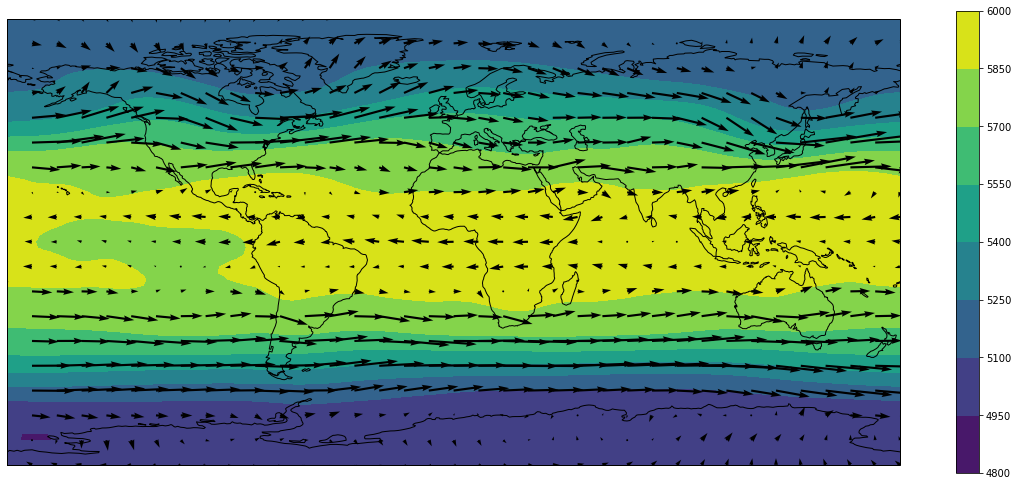

In [0]:
# (2) 500 hPa wind vectors and geopotential height
# (1981-2010 OND long term mean)

x = hgt.lon
y = hgt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot geopotential height as filled contours
data = hgt['hgt'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])

plt.show()

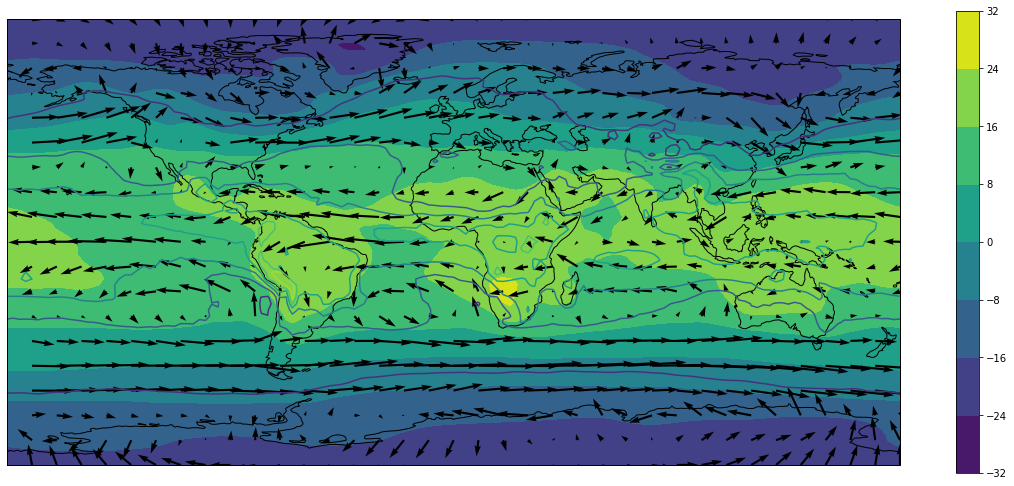

In [0]:
# (3) 850 hPa temperature, specific humidity, and winds
# (1981-2010 OND long term mean)

x = air.lon
y = air.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature as filled contours
data = air['air'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)

# Plot specific humidity as contours
data = shum['shum'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
ax.contour(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])

plt.show()

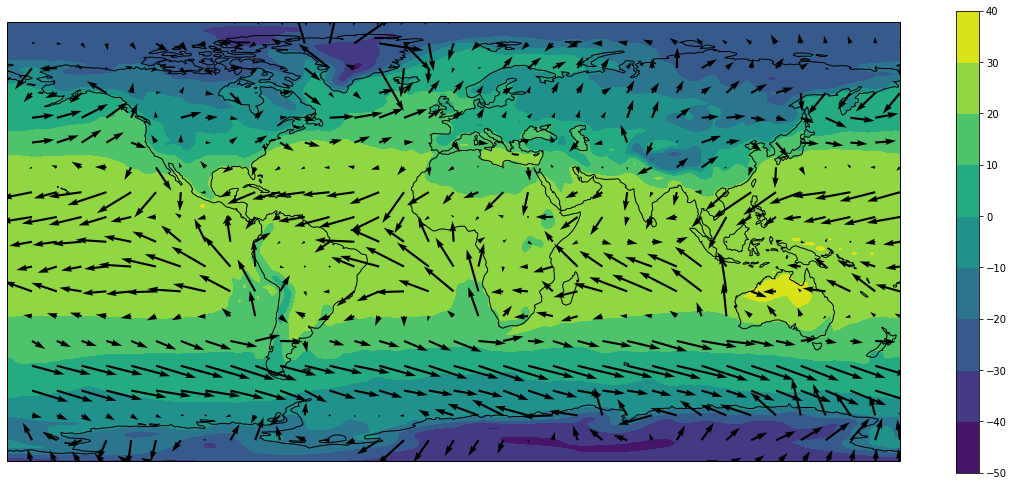

In [0]:
# (4) skin temperature, and surface wind vectors (sig995 level)
# (1981-2010 OND long term mean)

# For skin temperature, lat: 94, lon: 192
x = skt.lon
y = skt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot skin temperature as filled contours
data = skt['skt'].isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global()
ax.coastlines()

# Plot wind barbs, but not all of them
# For uwnd_sig995, lat: 73, lon: 144
x = uwnd_sig995.lon
y = uwnd_sig995.lat
quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd_sig995['uwnd'].isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd_sig995['vwnd'].isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
ax.set_ylim(-88.542, 88.542)

plt.show()

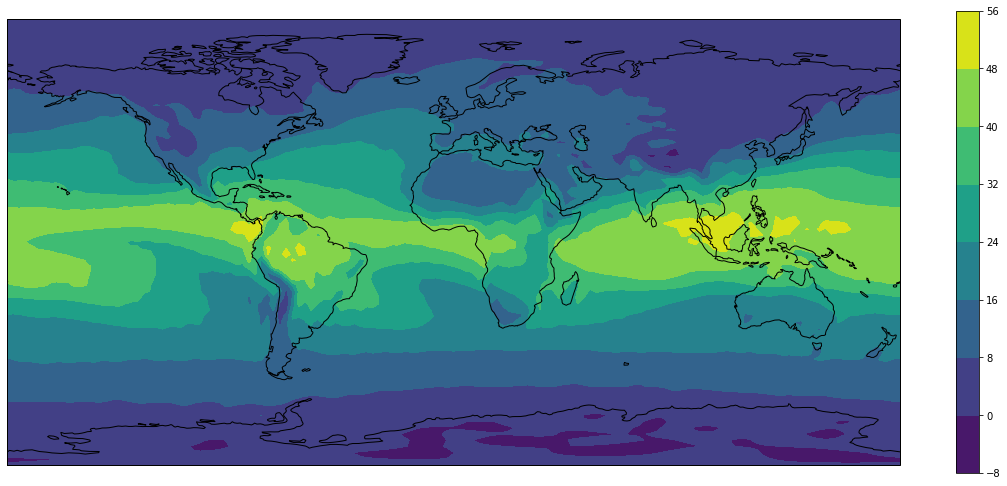

In [0]:
# (5) total atmospheric column water vapor
# (1981-2010 OND long term mean)

x = pr_wtr.lon
y = pr_wtr.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = pr_wtr['pr_wtr'].isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

plt.show()

# Calculate and plot the extremes

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 3/Project 3/

/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 3/Project 3


In [0]:
dates_95 = xr.open_dataset('datesexceeded.nc')

In [0]:
dates = pd.to_datetime(dates_95.time.values)
dates

DatetimeIndex(['1996-11-08', '1996-11-18', '1996-11-20', '1996-11-25',
               '1996-11-30', '1996-12-06', '1997-10-31', '1997-11-11',
               '1997-12-16', '1997-12-23',
               ...
               '2018-12-02', '2018-12-23', '2018-12-25', '2018-12-26',
               '2019-10-06', '2019-10-14', '2019-10-15', '2019-10-17',
               '2019-11-16', '2019-11-26'],
              dtype='datetime64[ns]', length=238, freq=None)

In [0]:
iyr = 1996
dates_yr = dates[where(dates.year == iyr)]
dates_yr

DatetimeIndex(['1996-11-08', '1996-11-18', '1996-11-20', '1996-11-25',
               '1996-11-30', '1996-12-06'],
              dtype='datetime64[ns]', freq=None)

In [0]:
# loading the daily data for extreme precip dates
years = pd.date_range(start='1996-01-01', end='2019-12-01', freq='AS')
varname = ['uwnd','vwnd','hgt','air','shum','skt','uwnd_sig995','vwnd_sig995','pr_wtr','prate']

data_list = {}
for ivar in varname:
  data_list[ivar] = []

for iyr in years.year:
  print('working on '+str(iyr))
  # extreme precip dates for this year
  dates_yr = dates[where(dates.year == iyr)]
  print('how many extreme dates?', dates_yr.size)
  # collect data except for wspd, which is not available in daily dataset
  data_sel = {}
  data_sel['uwnd'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['vwnd'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['hgt'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc', engine='netcdf4').sel(level=500, time=dates_yr)
  data_sel['air'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/air.'+str(iyr)+'.nc', engine='netcdf4').sel(level=850, time=dates_yr)
  data_sel['shum'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc', engine='netcdf4').sel(level=850, time=dates_yr)
  data_sel['skt'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['uwnd_sig995'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/uwnd.sig995.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['vwnd_sig995'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/vwnd.sig995.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['pr_wtr'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/pr_wtr.eatm.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['prate'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/prate.sfc.gauss.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  for ivar in varname:
    data_list[ivar].append(data_sel[ivar])

# concatenate the data and calculate the time average
print('concatenate the data and calculate the time average')
extremes_tavg = {}
for ivar in varname:
  extremes_tavg[ivar] = xr.concat(data_list[ivar], dim='time').mean(dim='time')


working on 1996
how many extreme dates? 6
working on 1997
how many extreme dates? 4
working on 1998
how many extreme dates? 4
working on 1999
how many extreme dates? 11
working on 2000
how many extreme dates? 12
working on 2001
how many extreme dates? 7
working on 2002
how many extreme dates? 9
working on 2003
how many extreme dates? 8
working on 2004
how many extreme dates? 13
working on 2005
how many extreme dates? 10
working on 2006
how many extreme dates? 13
working on 2007
how many extreme dates? 15
working on 2008
how many extreme dates? 9
working on 2009
how many extreme dates? 9
working on 2010
how many extreme dates? 12
working on 2011
how many extreme dates? 6
working on 2012
how many extreme dates? 13
working on 2013
how many extreme dates? 8
working on 2014
how many extreme dates? 7
working on 2015
how many extreme dates? 14
working on 2016
how many extreme dates? 13
working on 2017
how many extreme dates? 19
working on 2018
how many extreme dates? 10
working on 2019
how ma

In [0]:
for ivar in varname:
  filename = 'extremes_tavg_' + ivar
  extremes_tavg[ivar].to_netcdf('./' + filename)

In [0]:
# we can use the saved data instead of generating the data again
varname = ['uwnd','vwnd','hgt','air','shum','skt','uwnd_sig995','vwnd_sig995','pr_wtr']

extremes_tavg = {}
for ivar in varname:
  extremes_tavg[ivar] = xr.open_dataset('./extremes_tavg_'+ivar)

In [0]:
extremes_tavg['air']

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
    level    float32 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (lat, lon) float32 ...

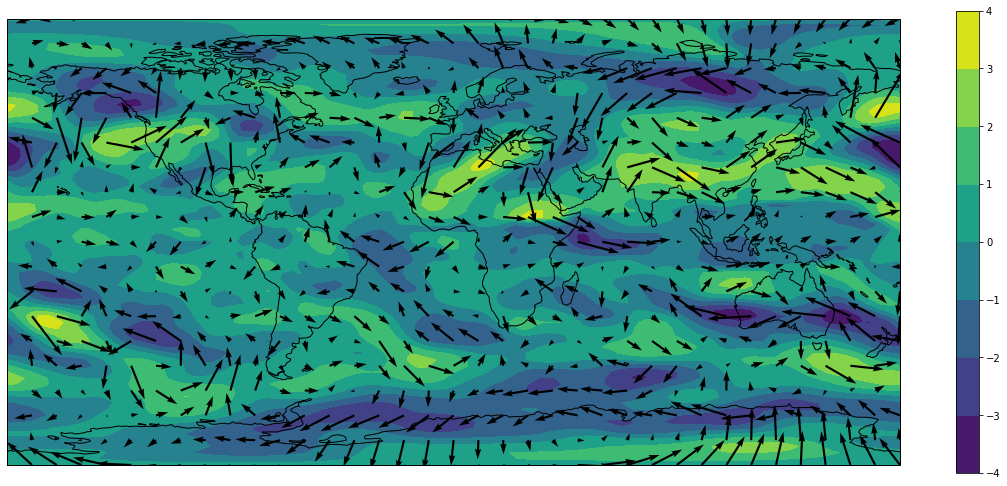

In [0]:
# (6) 250 hPa wind vectors and wind speed anomalies
# (compared with 1981-2010 OND long term mean)

x = uwnd.lon
y = uwnd.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot wind speed as filled contours
u_ext = extremes_tavg['uwnd'].sel(level=250.)
v_ext = extremes_tavg['vwnd'].sel(level=250.)
wspd_uv_ext = sqrt(u_ext['uwnd']**2 + v_ext['vwnd']**2)

u_diff = u_ext['uwnd'] - u
v_diff = v_ext['vwnd'] - v
wspd_uv_diff = wspd_uv_ext - wspd_uv

data = wspd_uv_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])

plt.show()

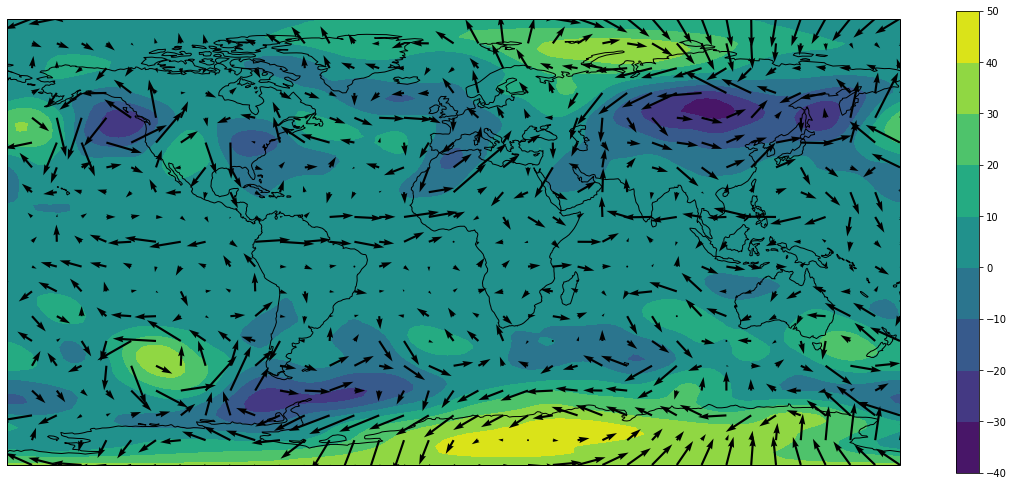

In [0]:
# (7) 500 hPa wind vectors and geopotential height anomalies
# (compared with 1981-2010 OND long term mean)

x = hgt.lon
y = hgt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot geopotential height as filled contours
hgt = hgt['hgt'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
hgt_ext = extremes_tavg['hgt']

data = hgt_ext['hgt'] - hgt
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
u = uwnd['uwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
u_ext = extremes_tavg['uwnd'].sel(level=500.)
v_ext = extremes_tavg['vwnd'].sel(level=500.)
u_diff = u_ext['uwnd'] - u
v_diff = v_ext['vwnd'] - v

quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])

plt.show()

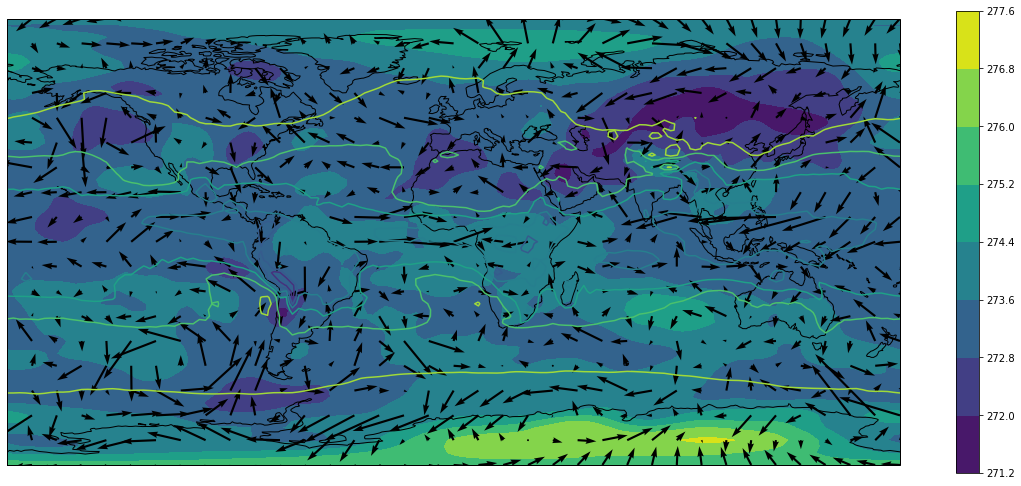

In [0]:
# (8) 850 hPa temperature, specific humidity, and winds anomalies
# (compared with 1981-2010 OND long term mean)

x = air.lon
y = air.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature as filled contours
air_ltm = air['air'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
air_ext = extremes_tavg['air']

data = air_ext['air'] - air_ltm
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)

# Plot specific humidity as contours
shum_ltm = shum['shum'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
shum_ext = extremes_tavg['shum']

data = shum_ext['shum'] - shum_ltm
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
ax.contour(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# Plot wind barbs, but not all of them
u850_ltm = uwnd['uwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
v850_ltm = vwnd['vwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
u850_ext = extremes_tavg['uwnd'].sel(level=850.)
v850_ext = extremes_tavg['vwnd'].sel(level=850.)
u_diff = u850_ext['uwnd'] - u850_ltm
v_diff = v850_ext['vwnd'] - v850_ltm

quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])

plt.show()

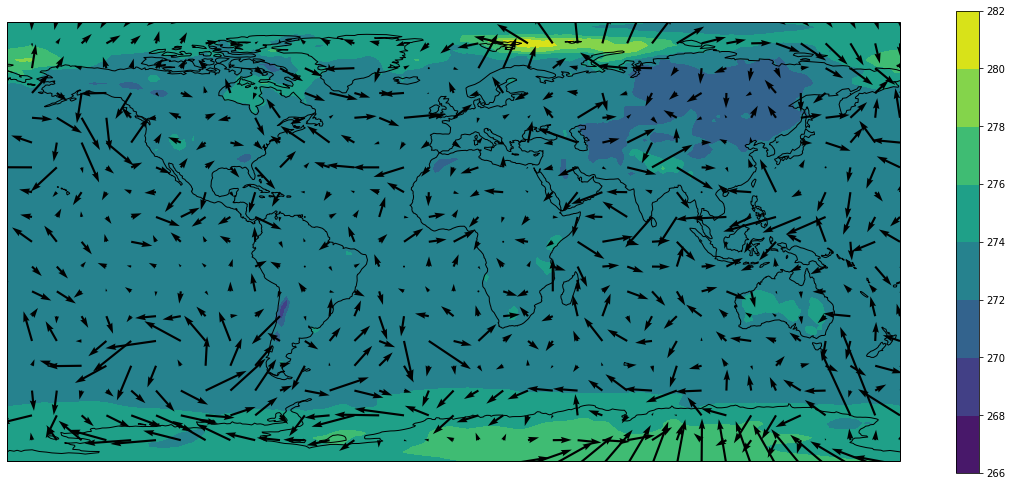

In [0]:
# (9) skin temperature, and surface wind vectors (sig995 level) anomalies
# (compared with 1981-2010 OND long term mean)

# For skin temperature, lat: 94, lon: 192
x = skt.lon
y = skt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot skin temperature as filled contours
skt_ltm = skt['skt'].isel(time=[9,10,11]).mean(dim='time')
skt_ext = extremes_tavg['skt']

data = skt_ext['skt'] - skt_ltm
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global()
ax.coastlines()

# Plot wind barbs, but not all of them
# For uwnd_sig995, lat: 73, lon: 144
x = uwnd_sig995.lon
y = uwnd_sig995.lat
usfc_ltm = uwnd_sig995['uwnd'].isel(time=[9,10,11]).mean(dim='time')
vsfc_ltm = vwnd_sig995['vwnd'].isel(time=[9,10,11]).mean(dim='time')
usfc_ext = extremes_tavg['uwnd_sig995']
vsfc_ext = extremes_tavg['vwnd_sig995']
usfc_diff = usfc_ext['uwnd'] - usfc_ltm
vsfc_diff = vsfc_ext['vwnd'] - vsfc_ltm

quiver_strides = 4
ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         usfc_diff.values[::quiver_strides,::quiver_strides],
         vsfc_diff.values[::quiver_strides,::quiver_strides])
ax.set_ylim(-88.542, 88.542)

plt.show()

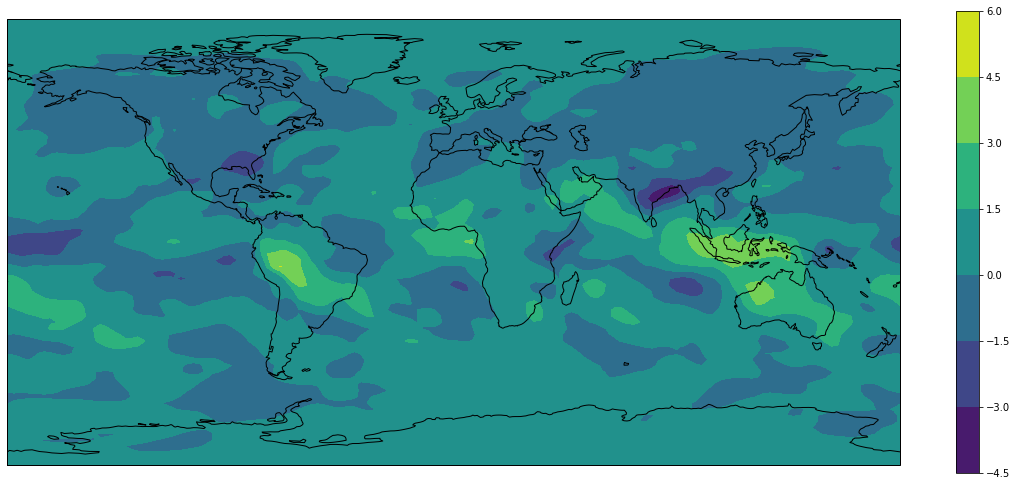

In [0]:
# (10) total atmospheric column water vapor anomalies
# (compared with 1981-2010 OND long term mean)

x = pr_wtr.lon
y = pr_wtr.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
pr_wtr_ltm = pr_wtr['pr_wtr'].isel(time=[9,10,11]).mean(dim='time')
pr_wtr_ext = extremes_tavg['pr_wtr']

data = pr_wtr_ext['pr_wtr'] - pr_wtr_ltm
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()

plt.show()

In [0]:
prate=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/prate.sfc.mon.ltm.nc', engine='netcdf4')
extremes_tavg['prate'] = xr.open_dataset('./extremes_tavg_prate')

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


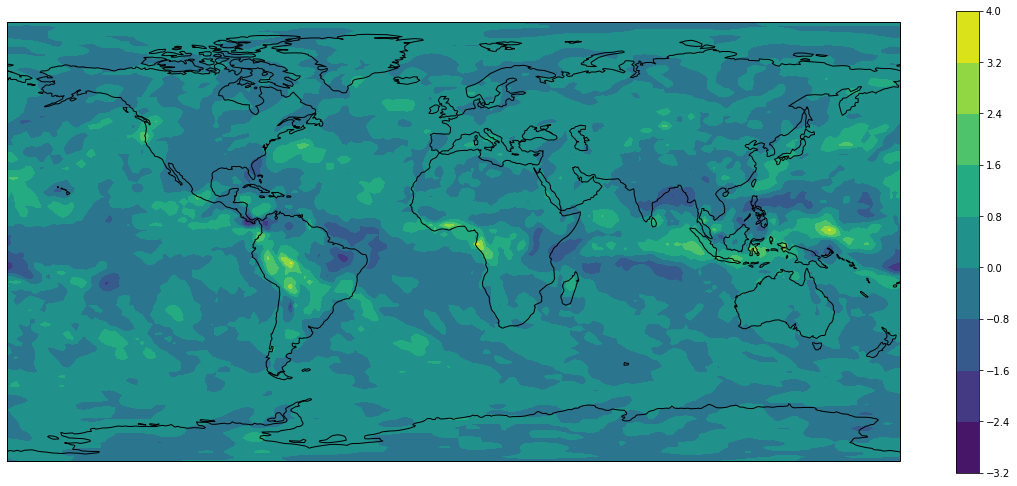

In [0]:
x = prate.lon
y = prate.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
prate_ltm = prate['prate'].isel(time=[9,10,11]).mean(dim='time')
prate_ext = extremes_tavg['prate']

data = (prate_ext['prate'] - prate_ltm) * 86400  # kg/m^2/s to mm/day
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
contourf_ = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree())
cbar = fig.colorbar(contourf_)
ax.set_global() 
ax.coastlines()
ax.set_ylim(-88.542, 88.542)

plt.show()